# Correlogram

## Data Wrangling

### Libraries

In [1]:
import pandas as pd

### Load Data

In [2]:
# read in the dataframe
df_001 = pd.read_csv("Harvey_CorrelationMatrix_v002.csv", encoding = "cp1252")
print(df_001.shape)
print(df_001.head())

(100, 14)
   Codes     Lat_dm     Long_dm  EM01_VCSi  EM02_Fsa  EM03_Fsa  EM04_Csa  \
0      1  45°43.962  067°00.691        NaN       NaN       NaN       NaN   
1      2  45°43.969  067°00.673        NaN       NaN       NaN       NaN   
2      3  45°43.988  067°00.658   0.401865  0.286703  0.311432       0.0   
3      4  45°43.997  067°00.646   0.274545  0.126995  0.598460       0.0   
4      5  45°44.003  067°00.687        NaN       NaN       NaN       NaN   

      Mode          Ti    Lat_dd   Long_dd  Beaufort Wind_Speed  Disturb_Depth  
0      NaN  543.206316  45.73270 -67.01152         8  50-61km/h            4.4  
1      NaN  512.490427  45.73282 -67.01122         8  50-61km/h            4.4  
2  169.056  440.316020  45.73313 -67.01097         6  29-38km/h            2.9  
3  169.056  149.999099  45.73328 -67.01077         4  12-19km/h            1.6  
4      NaN  935.942387  45.73338 -67.01145         6  29-38km/h            2.9  


### Check NAs

In [3]:
df_001.isnull().values.any()

True

### Drop NAs

In [4]:
df_002 = df_001.dropna(axis=0)

print(df_002.shape)
print(df_002.head())

(84, 14)
   Codes     Lat_dm     Long_dm  EM01_VCSi  EM02_Fsa  EM03_Fsa  EM04_Csa  \
2      3  45°43.988  067°00.658   0.401865  0.286703  0.311432  0.000000   
3      4  45°43.997  067°00.646   0.274545  0.126995  0.598460  0.000000   
5      6  45°43.978  067°00.609   0.048200  0.267261  0.684539  0.000000   
6      7  45°43.992  067°00.706   0.234884  0.000000  0.000000  0.523794   
7      8  45°43.934  067°00.724   0.409310  0.590690  0.000000  0.000000   

       Mode           Ti    Lat_dd   Long_dd  Beaufort Wind_Speed  \
2  169.0560   440.316020  45.73313 -67.01097         6  29-38km/h   
3  169.0560   149.999099  45.73328 -67.01077         4  12-19km/h   
5  169.0560  1116.804433  45.73297 -67.01015         3  6-11km/h    
6  471.6525   699.814805  45.73320 -67.01177         8  50-61km/h   
7   38.0099   512.760987  45.73290 -67.01207         9  62-74km/h   

   Disturb_Depth  
2            2.9  
3            1.6  
5            1.0  
6            4.4  
7            5.3  


### Drop Columns

In [5]:
df_003 = df_002.drop(['Codes','Lat_dm','Long_dm','Lat_dd','Long_dd','Wind_Speed'], axis = 1)

print(df_003.shape)
print(df_003.head())

(84, 8)
   EM01_VCSi  EM02_Fsa  EM03_Fsa  EM04_Csa      Mode           Ti  Beaufort  \
2   0.401865  0.286703  0.311432  0.000000  169.0560   440.316020         6   
3   0.274545  0.126995  0.598460  0.000000  169.0560   149.999099         4   
5   0.048200  0.267261  0.684539  0.000000  169.0560  1116.804433         3   
6   0.234884  0.000000  0.000000  0.523794  471.6525   699.814805         8   
7   0.409310  0.590690  0.000000  0.000000   38.0099   512.760987         9   

   Disturb_Depth  
2            2.9  
3            1.6  
5            1.0  
6            4.4  
7            5.3  


In [8]:
# after looking at distributions (see correlogram)
df_004 = df_003.drop(['EM03_Fsa', 'EM04_Csa', 'Mode', 'Disturb_Depth'], axis = 1)
df_004.head()

,EM01_VCSi,EM02_Fsa,Ti,Beaufort
2,0.401865,0.286703,440.316020,6
3,0.274545,0.126995,149.999099,4
5,0.048200,0.267261,1116.804433,3
6,0.234884,0.000000,699.814805,8
7,0.409310,0.590690,512.760987,9


## Correlogram

### Libraries

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

### Plot

**Plot all variables**

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


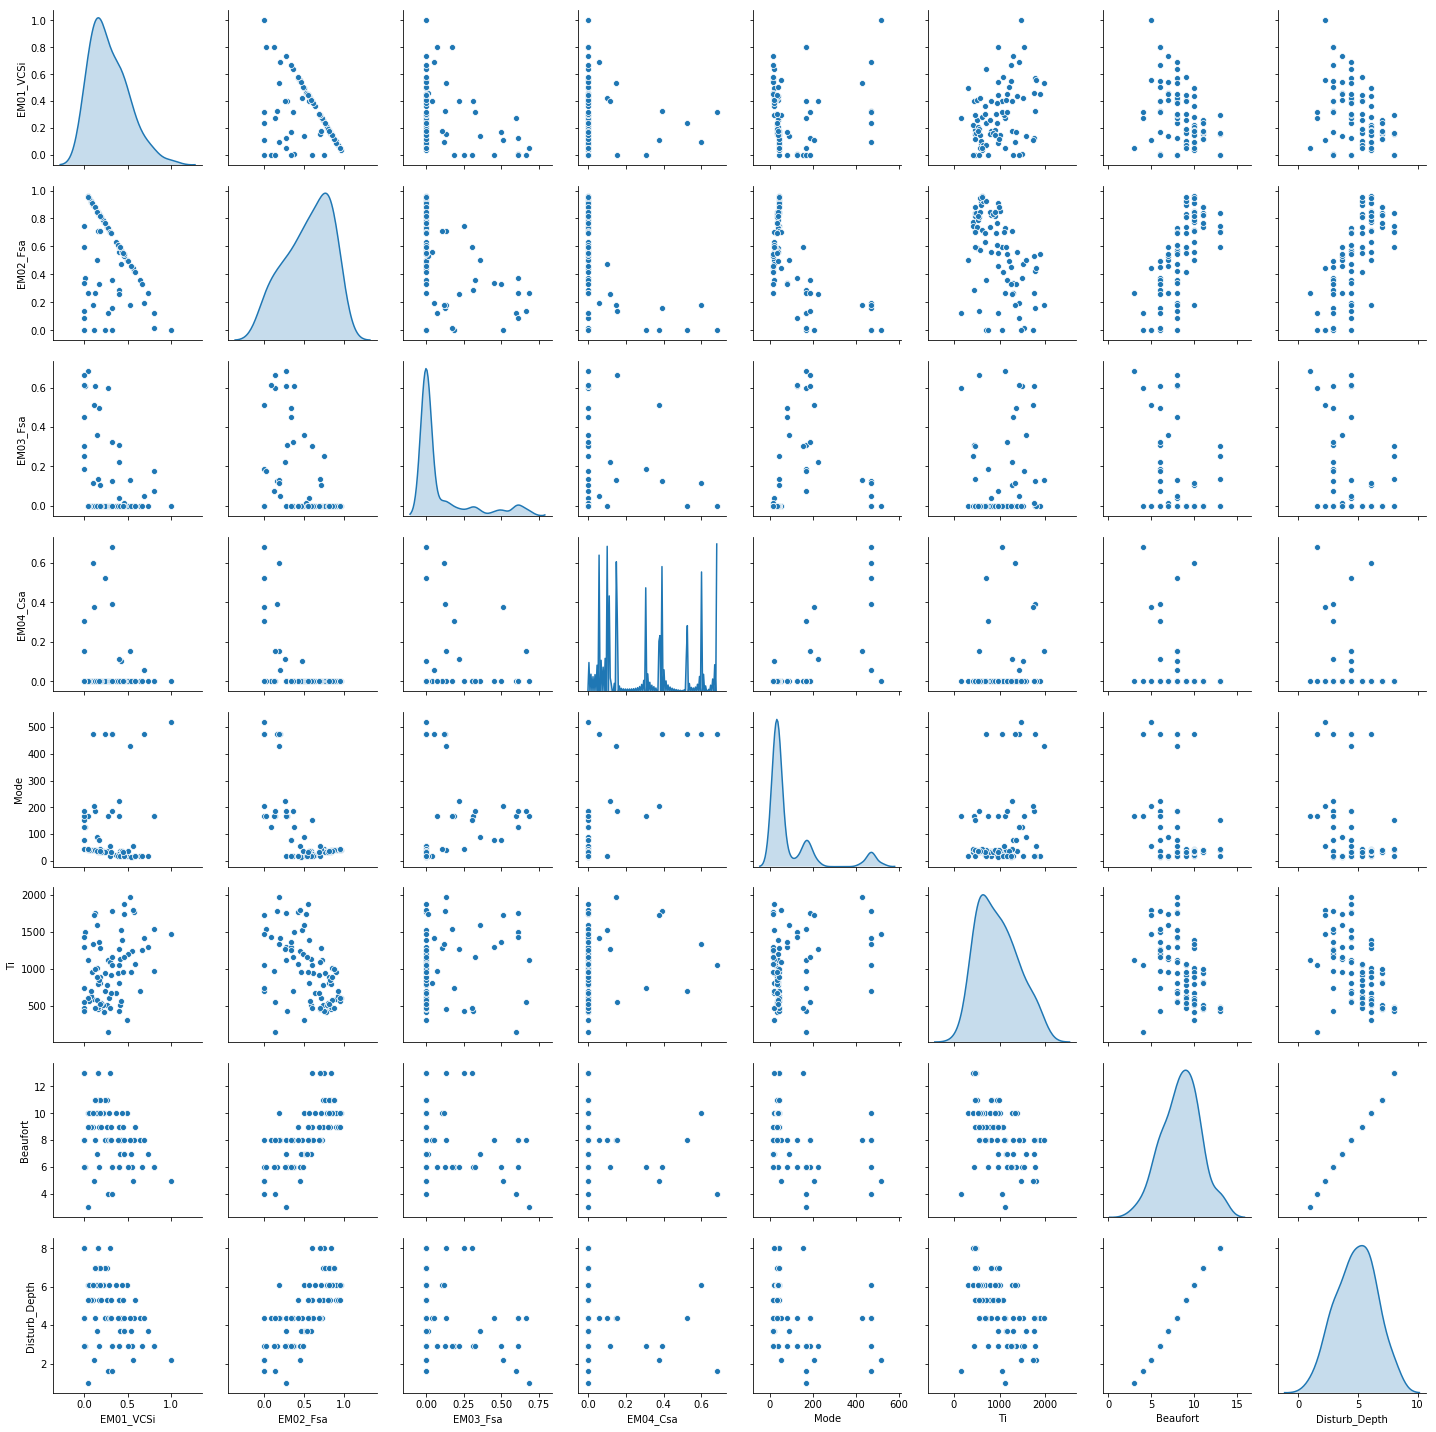

In [7]:
# source: https://python-graph-gallery.com/111-custom-correlogram/
fig = sns.pairplot(df_003, diag_kind="kde")

fig.savefig('Mazzella_Chap01_Correlogram_All.png')

**v003**
*EM3 and Mode show right skewed distributions. EM3 is characterised by a large number of zeroes. The EM4 distribution is sporadic. Beaufort and Disturbance Depth are strongly correlated, Beaufort is based on Disturbance Depth.*


**Plot select variables**

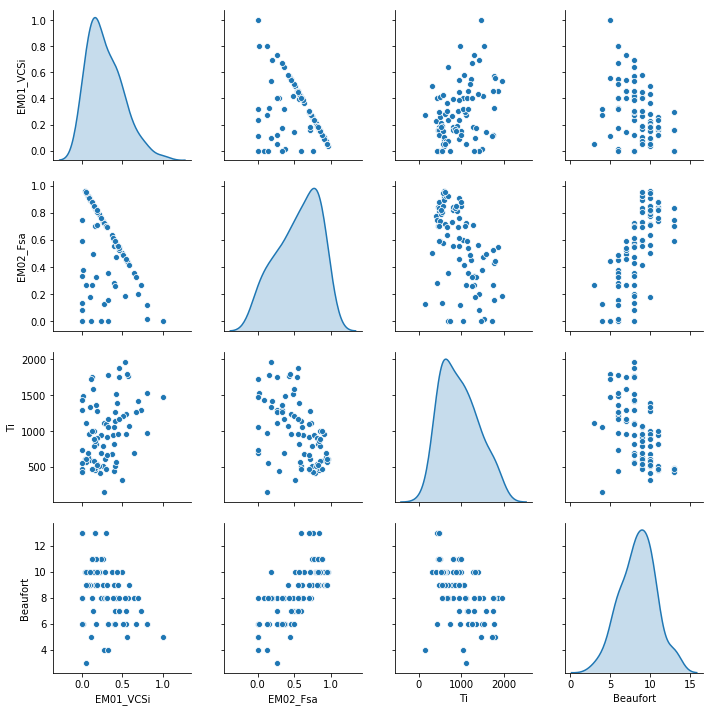

In [9]:
# source: https://python-graph-gallery.com/111-custom-correlogram/
fig = sns.pairplot(df_004, diag_kind="kde")

fig.savefig('Mazzella_Chap01_Correlogram_Select.png')

**v004**
*EM1 and EM2, showed a negative relationship, which is expected of a closed system. Beaufort shows a positive/negative relationship with EM2/1 and a negative relationship with Ti.*

In [10]:
df_004_pearson = df_004.corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

df_004_pearson.to_csv('Mazzella_Chap01_PearsonMatrix_Raw.csv', index=False)